In [2]:
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import cv2
import imutils
from google.colab.patches import cv2_imshow

(445, 800, 3)


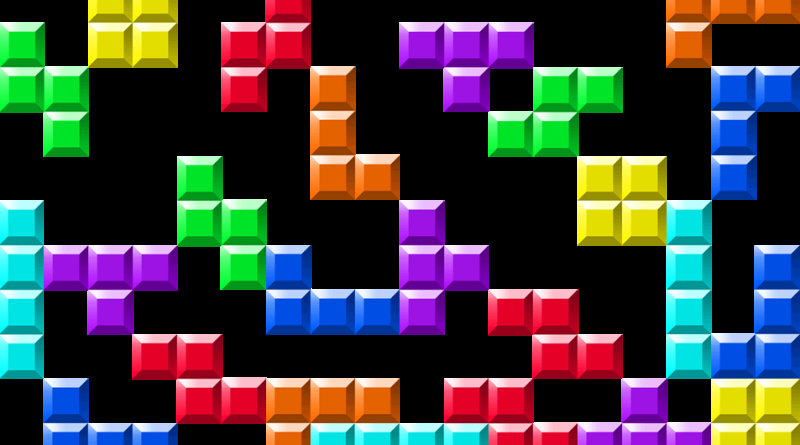

(414, 597, 3)


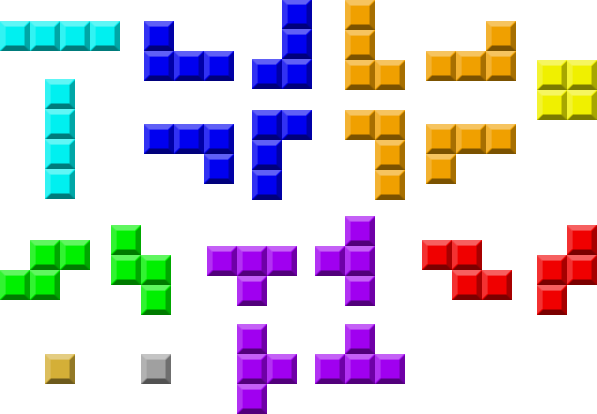

-1

In [4]:
image1 = cv2.imread("/content/drive/My Drive/tetris1.png")
image2 = cv2.imread("/content/drive/My Drive/tetris2.png")

print(image1.shape)
cv2_imshow(image1)
cv2.waitKey(0)

print(image2.shape)
cv2_imshow(image2)
cv2.waitKey(0)

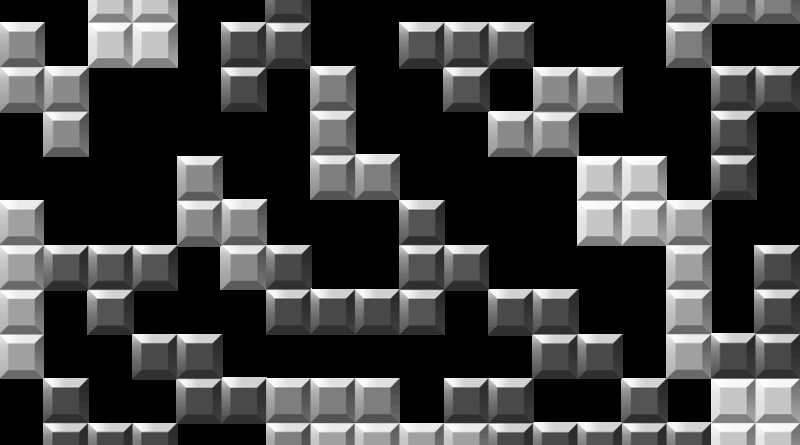

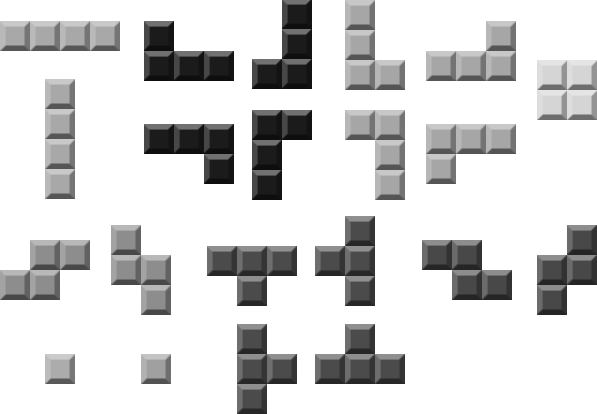

-1

In [5]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

cv2_imshow(gray1)
cv2_imshow(gray2)
cv2.waitKey()

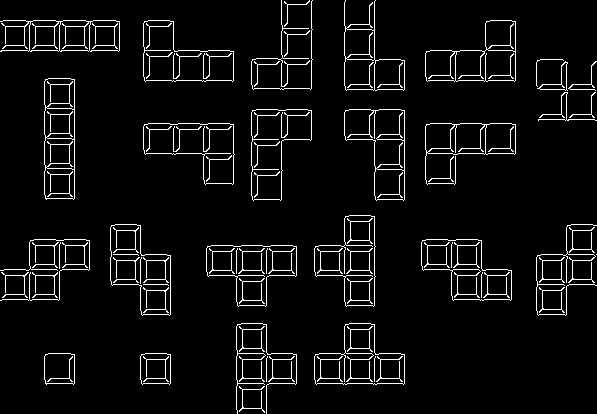

-1

In [6]:
edged1 = cv2.Canny(gray2,30,150)
cv2_imshow(edged1)
cv2.waitKey()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<class 'numpy.ndarray'>


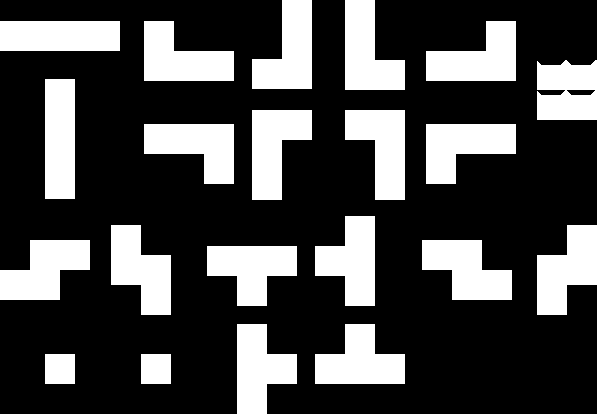

-1

In [7]:
thresh = cv2.threshold(gray2,225,255,cv2.THRESH_BINARY_INV)[1]
print(cv2.threshold(gray2,225,255,cv2.THRESH_BINARY_INV)[1])
print(type(thresh))
cv2_imshow(thresh)
cv2.waitKey()

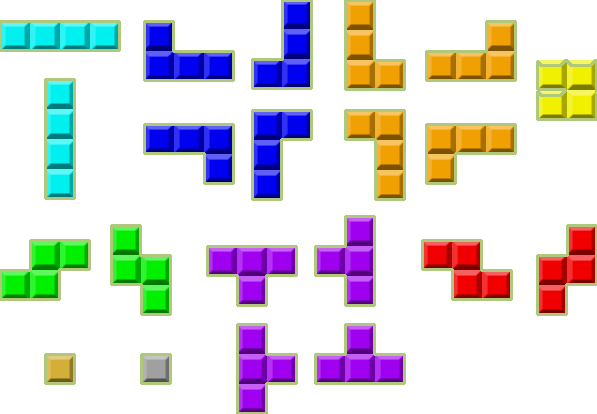

-1

In [8]:
cnts = cv2.findContours(thresh.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
output = image2.copy()


for c in cnts:
  cv2.drawContours(output,[c],-1,(123,200,175),2)
cv2_imshow(output)
cv2.waitKey(0)

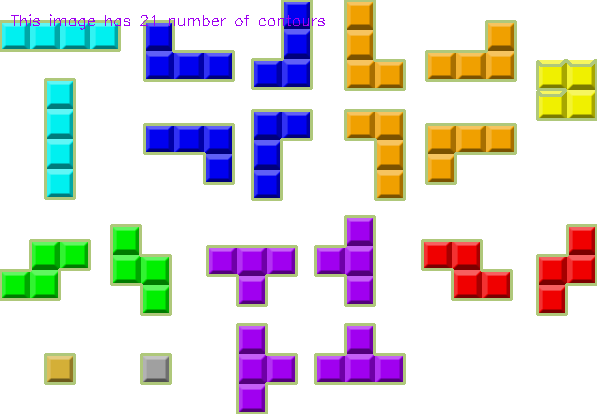

-1

In [9]:
text = "This image has {} number of contours".format(len(cnts))
cv2.putText(output,text,(10,25),  cv2.FONT_HERSHEY_SIMPLEX, 0.5,
	(240, 0, 159), 1)
cv2_imshow(output)
cv2.waitKey(0)

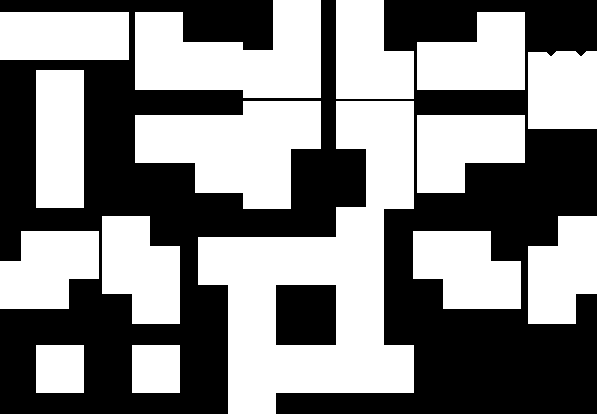

-1

In [14]:
mask = thresh.copy()
mask = cv2.dilate(mask, None, iterations=9)
cv2_imshow(mask)
cv2.waitKey(0)